In [1]:
import ROOT,glob,math,os
from array import array

Welcome to JupyROOT 6.18/00


In [2]:
pi=ROOT.TMath.Pi()
path="./BmumuMerge/"
paths=glob.glob(path+"*root")
rootpath=paths[0]
outpath="test1.root"
#outpath=rootpath.replace("/root","/hist").replace(".root","_km.root")
print(outpath)

hx=ROOT.TH1F("x_mass","x_mass",200,0,20)
hp1=ROOT.TH1F("muon_1_pt","muon_1_pt",200,0,50)
hp2=ROOT.TH1F("muon_2_pt","muon_2_pt",200,0,50)
hp3=ROOT.TH1F("muon_3_pt","muon_3_pt",200,0,50)
hp4=ROOT.TH1F("muon_4_pt","muon_4_pt",200,0,50)
#hp5=ROOT.TH1F("jpsi_1_pt","jpsi_1_pt",200,0,80)
#hp6=ROOT.TH1F("jpsi_2_pt","jpsi_2_pt",200,0,80)
he1=ROOT.TH1F("muon_1_eta","muon_1_eta",200,-pi,pi)
he2=ROOT.TH1F("muon_2_eta","muon_2_eta",200,-pi,pi)
he3=ROOT.TH1F("muon_3_eta","muon_3_eta",200,-pi,pi)
he4=ROOT.TH1F("muon_4_eta","muon_4_eta",200,-pi,pi)
#he5=ROOT.TH1F("jpsi_1_eta","jpsi_1_eta",200,-pi,pi)
#he6=ROOT.TH1F("jpsi_2_eta","jpsi_2_eta",200,-pi,pi)

f=ROOT.TFile(rootpath,"r")
t=f.Get("nominal")
N=t.GetEntries()
for i in range(10):
    t.GetEntry(i)
    #Match
    muon_1=ROOT.TLorentzVector()
    muon_2=ROOT.TLorentzVector()
    muon_3=ROOT.TLorentzVector()
    muon_4=ROOT.TLorentzVector()
    #jpsi_1=ROOT.TLorentzVector()
    #jpsi_2=ROOT.TLorentzVector()
    muon_1.SetPxPyPzE(t.muon_1[0],t.muon_1[1],t.muon_1[2],t.muon_1[3])
    muon_2.SetPxPyPzE(t.muon_2[0],t.muon_2[1],t.muon_2[2],t.muon_2[3])
    muon_3.SetPxPyPzE(t.muon_3[0],t.muon_3[1],t.muon_3[2],t.muon_3[3])
    muon_4.SetPxPyPzE(t.muon_4[0],t.muon_4[1],t.muon_4[2],t.muon_4[3])
    #jpsi_1.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
    #jpsi_2.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
    
    muon_1_pt_eta=[muon_1.Pt()/1000.0,muon_1.Eta()]
    muon_2_pt_eta=[muon_2.Pt()/1000.0,muon_2.Eta()]
    muon_3_pt_eta=[muon_3.Pt()/1000.0,muon_3.Eta()]
    muon_4_pt_eta=[muon_4.Pt()/1000.0,muon_4.Eta()]
    #jpsi_1_pt_eta=[jpsi_1.Pt()/1000.0,jpsi_1.Eta()]
    #jpsi_2_pt_eta=[jpsi_2.Pt()/1000.0,jpsi_2.Eta()]
    muon_list=[muon_1_pt_eta,muon_2_pt_eta,muon_3_pt_eta,muon_4_pt_eta]
    #print(muon_list)
    muon_list=sorted(muon_list)
    #print(muon_list)
    muon_1_pt=muon_list[3][0]
    muon_2_pt=muon_list[2][0]
    muon_3_pt=muon_list[1][0]
    muon_4_pt=muon_list[0][0]
    muon_1_eta=muon_list[3][1]
    muon_2_eta=muon_list[2][1]
    muon_3_eta=muon_list[1][1]
    muon_4_eta=muon_list[0][1]
    #jpsi_list=[jpsi_1_pt_eta,jpsi_2_pt_eta]
    #jpsi_list=sorted(jpsi_list)
    #jpsi_1_pt=jpsi_list[1][0]
    #jpsi_2_pt=jpsi_list[0][0]
    #jpsi_1_eta=jpsi_list[1][1]
    #jpsi_2_eta=jpsi_list[0][1]
    
    x_mass=(muon_1+muon_2+muon_3+muon_4).M()/1000.0
    print(muon_1_pt,muon_2_pt,muon_3_pt,muon_4_pt,x_mass)
    hp1.Fill(muon_1_pt)
    hp2.Fill(muon_2_pt)
    hp3.Fill(muon_3_pt)
    hp4.Fill(muon_4_pt)
    #hp5.Fill(jpsi_1_pt)
    #hp6.Fill(jpsi_2_pt)
    he1.Fill(muon_1_eta)
    he2.Fill(muon_2_eta)
    he3.Fill(muon_3_eta)
    he4.Fill(muon_4_eta)
    #he5.Fill(jpsi_1_eta)
    #he6.Fill(jpsi_2_eta)
    hx.Fill(x_mass)

outFile = ROOT.TFile.Open(outpath,'UPDATE')
outFile.cd()
hx.Write(hx.GetName(),ROOT.TObject.kOverwrite)
hp1.Write(hp1.GetName(),ROOT.TObject.kOverwrite)
hp2.Write(hp2.GetName(),ROOT.TObject.kOverwrite)
hp3.Write(hp3.GetName(),ROOT.TObject.kOverwrite)
hp4.Write(hp4.GetName(),ROOT.TObject.kOverwrite)
#hp5.Write(hp5.GetName(),ROOT.TObject.kOverwrite)
#hp6.Write(hp6.GetName(),ROOT.TObject.kOverwrite)
he1.Write(he1.GetName(),ROOT.TObject.kOverwrite)
he2.Write(he2.GetName(),ROOT.TObject.kOverwrite)
he3.Write(he3.GetName(),ROOT.TObject.kOverwrite)
he4.Write(he4.GetName(),ROOT.TObject.kOverwrite)
#he5.Write(he5.GetName(),ROOT.TObject.kOverwrite)
#he6.Write(he6.GetName(),ROOT.TObject.kOverwrite)
outFile.Close()
f.Close()

test1.root
7.204453195217801 5.868789036377343 4.793652164479353 2.7660795655577863 17.835560104778335
12.564430424802891 4.355689960300066 3.9204880036735403 2.4678356515515283 17.26943550351492
13.763797380731829 9.802498143140829 9.089768632520217 6.859865932134094 40.06392295191519
8.015468625600699 6.880025465980136 5.329167321888412 4.593880745705922 39.61204095483484
13.765893793225628 7.324261012555268 4.696817392941394 2.842659950675153 36.1808128305195
6.892490308914443 6.767078619395861 3.614366179157137 3.2385886420717664 24.26228629998946
6.1498574715045 5.388340978613969 5.252108632214468 2.0977424088264662 19.431422302169178
7.159169059814274 6.465173698564654 3.0767157588502334 2.0281970076573232 23.775378072345003
5.514734601674989 5.096989957580351 3.829491626996822 3.0482496856401653 11.100850775672807
11.388059715501745 8.396912365615442 3.8978813960678043 3.162521550613471 27.935728999296146


In [48]:
path1="test.root"
f1=ROOT.TFile(path1,"r")
hists=[]
for i in f1.GetListOfKeys():
    print(i.GetName())
    hists.append(i.GetName())

x_mass
muon_1_pt
muon_2_pt
muon_3_pt
muon_4_pt
jpsi_1_pt
jpsi_2_pt
muon_1_eta
muon_2_eta
muon_3_eta
muon_4_eta
jpsi_1_eta
jpsi_2_eta


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


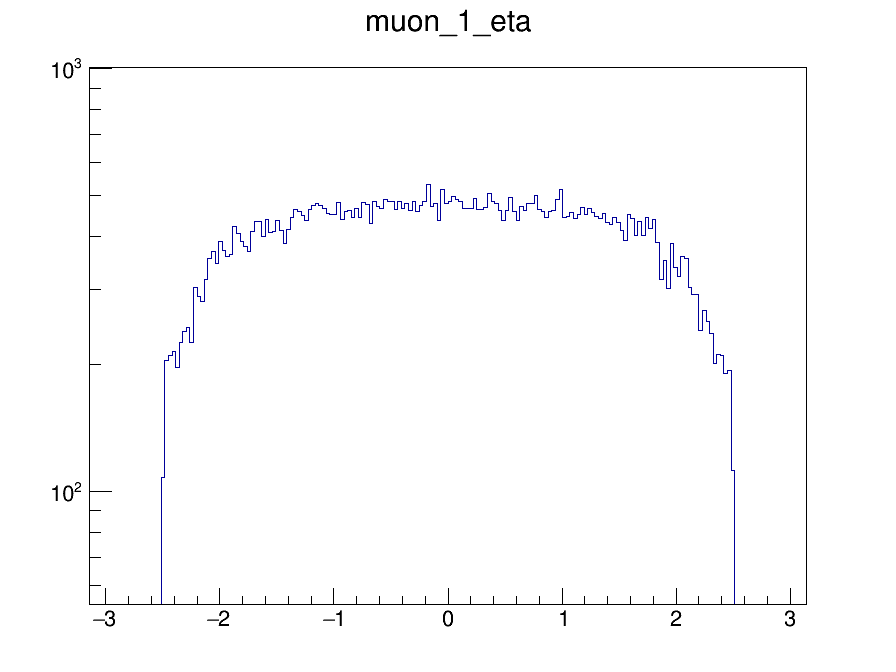

In [53]:
h1=f1.Get(hists[7])
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
#h1.Rebin(2)
h1.Draw()
c1.Draw()

In [40]:
#a  = array('f',[1,2,3,4])
#b=array('f',[2,1,3,4])
a=[1,4,2,3,5]
b=[3,1,8,3,5]
d=[2,3,6,87,4]
e=[54,2,3,4]
#c=array('f',[a,b])
c=[e,b,a,d]
print(c,sorted(c))


[[54, 2, 3, 4], [3, 1, 8, 3, 5], [1, 4, 2, 3, 5], [2, 3, 6, 87, 4]] [[1, 4, 2, 3, 5], [2, 3, 6, 87, 4], [3, 1, 8, 3, 5], [54, 2, 3, 4]]
